# 보스턴 집값예측

In [56]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.6 MB/s eta 0:00:00


In [57]:
import mglearn

In [58]:
import pandas as pd
import numpy as np

X, y = mglearn.datasets.load_extended_boston()

## 특성공학을 하지 않고 MSE를 고려했을 때

In [59]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
train_prec = lr.predict(X_train)
test_prec = lr.predict(X_test)
print(mean_squared_error(y_train, train_prec))
print(mean_squared_error(y_test, test_prec))

4.892447194412869
22.282696049278936


In [61]:
# Lasso
from sklearn.linear_model import Lasso

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_list = []
test_list = []

for i in alpha_list :
    lasso = Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    train_prec = lasso.predict(X_train)
    test_prec = lasso.predict(X_test)
    train_list.append(mean_squared_error(y_train, train_prec))
    test_list.append(mean_squared_error(y_test, test_prec))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+03, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.937e+02, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.082e+02, tolerance: 3.361e

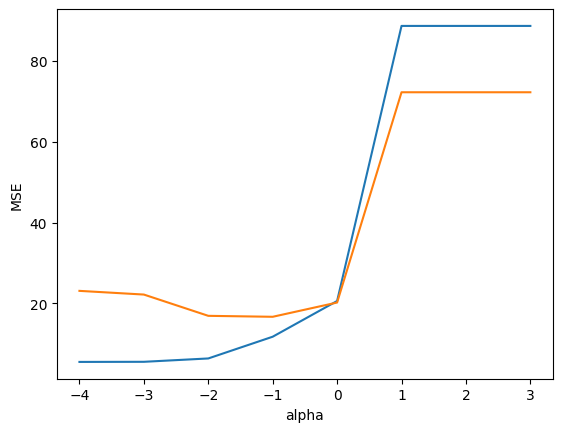

In [62]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [63]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
train_prec = lasso.predict(X_train)
test_prec = lasso.predict(X_test)
print(mean_squared_error(y_train, train_prec), mean_squared_error(y_test, test_prec))

20.589724781474303 20.209686854381875


In [64]:
# Ridge
from sklearn.linear_model import Ridge

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_list = []
test_list = []

for i in alpha_list :
    ridge = Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    train_prec = ridge.predict(X_train)
    test_prec = ridge.predict(X_test)
    train_list.append(mean_squared_error(y_train, train_prec))
    test_list.append(mean_squared_error(y_test, test_prec))

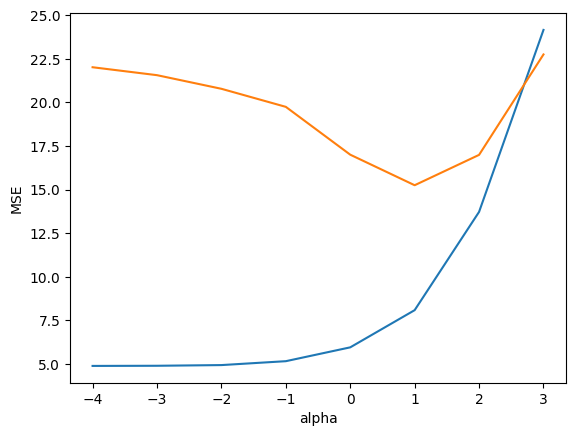

In [65]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [72]:
ridge = Ridge(alpha=600)
ridge.fit(X_train, y_train)
train_prec = ridge.predict(X_train)
test_prec = ridge.predict(X_test)
print(mean_squared_error(y_train, train_prec), mean_squared_error(y_test, test_prec))

21.035005507933096 21.035558925496463


# 특성공학을 하였을 때

In [76]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train),lr.score(X_test, y_test))

0.9448313975211592 0.7758378393351667


In [77]:
# 다항회귀
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
train_poly = poly.fit_transform(X_train)
test_poly = poly.fit_transform(X_test)

lrr = LinearRegression()
lrr.fit(train_poly, y_train)
print(lrr.score(train_poly, y_train), lrr.score(test_poly, y_test))

1.0 -9.877925392726493


In [78]:
# Lasso
from sklearn.linear_model import Lasso

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

train_list = []
test_list = []

for i in alpha_list :
    lasso = Lasso(alpha = i)
    lasso.fit(train_poly, y_train)
    train_list.append(lasso.score(train_poly, y_train))
    test_list.append(lasso.score(test_poly, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.153e+02, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.324e+02, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.850e+01, tolerance: 3.361e

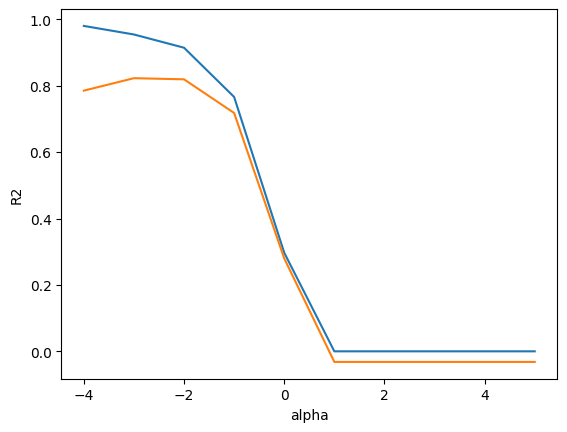

In [79]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

In [93]:
lasso = Lasso(alpha=0.1)
lasso.fit(train_poly, y_train)
print(lasso.score(train_poly, y_train), lasso.score(test_poly, y_test))

0.7660126181775819 0.7177691639866219


In [88]:
# Ridge
from sklearn.linear_model import Ridge

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

train_list = []
test_list = []

for i in alpha_list :
    ridge = Ridge(alpha = i)
    ridge.fit(train_poly, y_train)
    train_list.append(ridge.score(train_poly, y_train))
    test_list.append(ridge.score(test_poly, y_test))

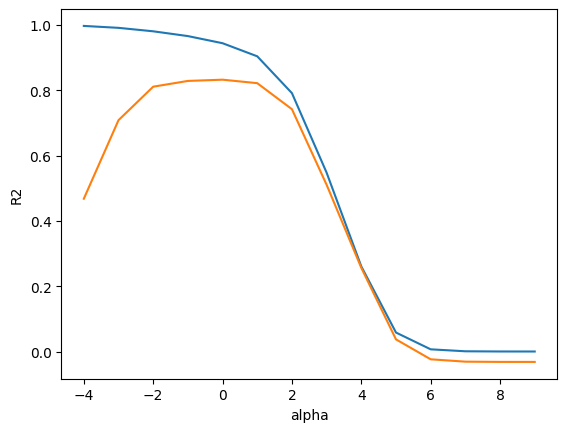

In [89]:
import matplotlib.pyplot as plt
# 훈련세트의 결정계수
plt.plot(np.log10(alpha_list), train_list)
# 테스트의 결정계수
plt.plot(np.log10(alpha_list), test_list)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

In [92]:
ridge = Ridge(alpha=100)
ridge.fit(train_poly, y_train)
print(ridge.score(train_poly, y_train), ridge.score(test_poly, y_test))

0.7910218983971743 0.7418678531358243
